# Introduction

### This notebook focuses on implementing an EDA based on housing data provided by the text: 

### Hands On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition,

### the dataset is available here: 

### https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Load Data

In [1]:
# I want to start by pulling in the dataset
# We can create a function to fetch and unload the dataset
# Because we know the direct URL
# This can increase immediate usability across devices

# Now is a good time to declare some useful/common import statements for the program as well

In [2]:
# seaborn is a tool that helps with graphing data, although pandas can do this too
# I will declare the stylesheet I want seaborn to use
# We could force pandas to display a max column value 
# This dataset does not need it, though

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Using Anaconda, be aware of file location/path differences between native vs conda

# Alternative: alter the filepath as appropriate
# housing_df = pd.read_csv('./Documents/Datasets/housing/housing/housing.csv')

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_df = load_housing_data()

# Inspect Data

In [4]:
# I have succesfully read the file into a dataframe called housing_df
# Now is a good time to explore/inspect the data in the df 

# Let's check the shape of the dataframe
# This will tell us the # of rows and columns

housing_df.shape

(20640, 10)

In [5]:
# With 10 columns, there is inded no reason to change pandas max column value
# These numbers can be referenced later as we start pulling data to see 
# how the manipulated data changes in rows/columns vs the original dataframe

In [6]:
# Next, I will run a head on the df to see the first 5 columns
# We can then gain some insights on the data

# Optionally you use an int parameter to display more data
# You could call df.tail() to see the last 5 values in the dataframe

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Notice that most of the data is int [correction: float] but ocean_proximity is object (string)
# The data is numbered by index 0-4 on the left
# There doesn't seem to be excess columns in the dataframe

# I am seeing some opportunities to link data in the future:
# total_rooms and total_bedrooms are relational, for instance

# No immediate NaN values, but still needs to be explored

# Noticing median_income is reported using a different style
# will need to address in future

In [8]:
# I have an idea of what the datatypes are based on the values shown
# But we can make sure and explore deeper with pandas

housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
# As we can see, although internally I knew positional .0's are floats
# I wrote out int in my comments above
# this is a good reason to call dtypes and prevent mistakes

# We also confirm that ocean_proximity is of type object -> strings are objects
# It is possible we will need to manipulate/cast the dtype of ocean_proximity
# due to model behaviour

In [10]:
# Let's go ahead and call another method on our dataframe

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# Columns from info match data obtained from calling shape
# We confirm dtypes of the dataframe
# Using our previous shape row info (20640) we can see
# null values exist only in the total_bedrooms attribute
# We will have to address that later

In [12]:
# I want to check the ocean_proximity object further using pandas
# So far we have only seen NEAR BAY

housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
# This helps us see all possible categories
# If we cast this data it is important to differentiate
# each category, ie: 1H Ocean might be tied better to near ocean than inland

# For now, let's take a statistical look at the dataframe
# Note: null values are ignored when calling describe

housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# Describe splits up the data into percentages, ie:
# 25%, 50% (the median), and 75%
# We can make observations about the data using these percentages

##### I refer to a data point as a district, and refer to data points as districts ####

# 50% of districts housing_median_age are lower than 29.0
# Look at the relation of percentage and total_rooms or total_bedrooms
# it increases as we include more houses, as does the housing_median_age

In [15]:
# Before we graph the data to see the data visually let's run a few more commands
# Run a head to refresh memory

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
# Let's call a column by attribute name

housing_df['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

In [17]:
# Let's call a row by index label
# .loc calls the label
# .iloc calls integer locations

# At the moment the label happens to be indexed in order
# If we delete data from the table, the label index might change
# ie: if we drop labels 26-29 from the table, 
# then the table will jump from label 25 to label 30, however the integer location will reference
# the label 25 as index 25 and the label 30 as index 26, for instance.

# I believe after you drop labels you can manually call to re-index the dataframe to avoid this

housing_df.loc[4]

longitude              -122.25
latitude                 37.85
housing_median_age        52.0
total_rooms             1627.0
total_bedrooms           280.0
population               565.0
households               259.0
median_income           3.8462
median_house_value    342200.0
ocean_proximity       NEAR BAY
Name: 4, dtype: object

In [18]:
# Another way to look for null values
# housing_df.isna() shows every value, can be overwhelming
# lets sum the data per column instead

housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
# Similarly, we can check duplications
# housing_df.duplicated() will give a similar view as isna()
# we can actually use it as a parameter for loc[]

housing_df.loc[housing_df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [20]:
# We can also check for subset values

housing_df.duplicated(subset=['longitude'])

0        False
1        False
2        False
3        False
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639     True
Length: 20640, dtype: bool

In [21]:
# Let's use the loc trick here too

housing_df.loc[housing_df.duplicated(subset=['longitude'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
# It's a good idea to think about why this is occuring 
# Not just for longitude, but other areas like income etc
# Note the rows and column totals vs the original dataframe

housing_df.query('longitude == -122.25')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18910,-122.25,37.79,52.0,902.0,237.0,846.0,227.0,3.6250,125000.0,NEAR BAY
18996,-122.25,37.49,40.0,2709.0,521.0,1156.0,510.0,4.6366,395500.0,NEAR OCEAN
19388,-122.25,37.87,41.0,685.0,141.0,266.0,123.0,5.2289,384600.0,NEAR BAY
19945,-122.25,39.79,16.0,2127.0,412.0,1104.0,369.0,3.0469,72200.0,INLAND


# Goal

### The given goal is to create a model that uses  California census data to predict housing prices in the state

### As such, we can establish the target attribute as the median house value (median_house_value), and the other attributes as features

# Visualize Data (uncorrected)

In [23]:
# Longitudes may be the same but latitude values change the ocean proximity
# ie: different locations based on the combination, makes sense
# Look how matching long/lat have matching ocean_proximity and 
# housing_median_age

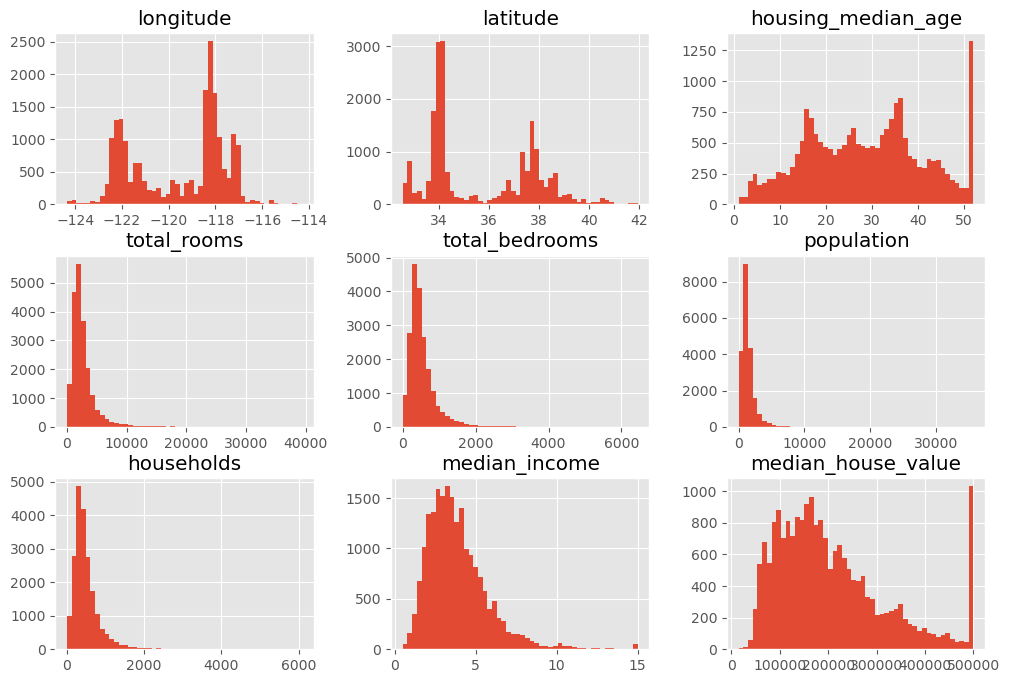

In [24]:
# Let's plot our data before we address the NaN values just to have a reference point

housing_df.hist(bins=50, figsize=(12, 8))
plt.show()

- It looks like most of the graphs are skewed right 
- It might be a good idea to force them into a normal distrubutionfor the model 
- It will be interesting to clear the NaN values and check for any outliers


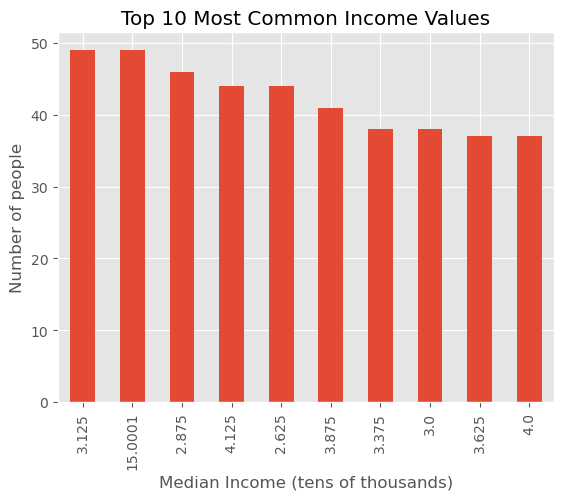

In [25]:
ax = housing_df['median_income'].value_counts().head(10).plot(kind='bar', title= 'Top 10 Most Common Income Values')
ax.set_xlabel('Median Income (tens of thousands)')
ax.set_ylabel('Number of people')
plt.show()

In [26]:
# We can call the data without plotting

housing_df['median_income'].value_counts().head(10)

median_income
3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.3750     38
3.0000     38
3.6250     37
4.0000     37
Name: count, dtype: int64

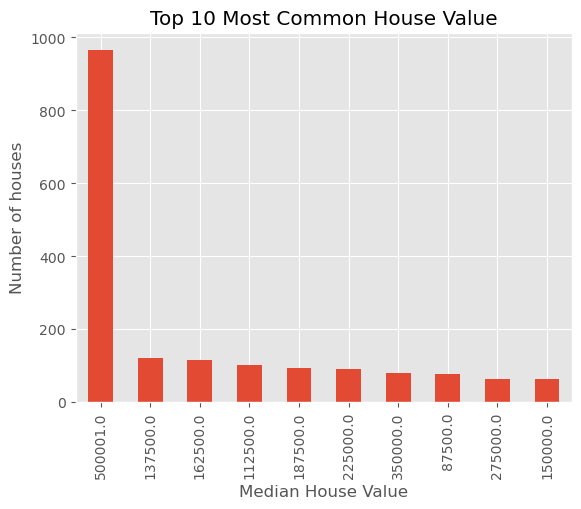

In [27]:
ax = housing_df['median_house_value'].value_counts().head(10).plot(kind='bar', title= 'Top 10 Most Common House Value')
ax.set_xlabel('Median House Value')
ax.set_ylabel('Number of houses')
plt.show()

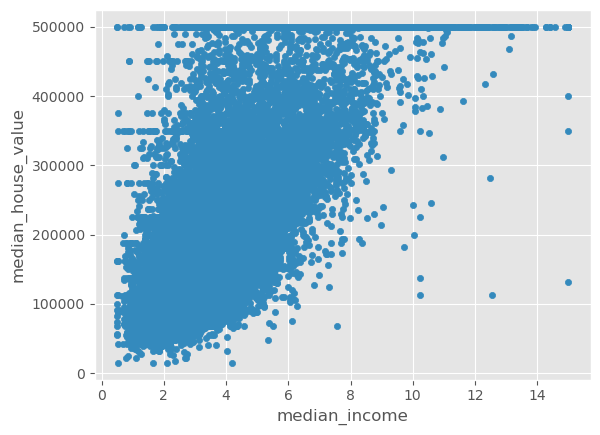

In [28]:
# Let's plot this data in a different way 

housing_df.plot(kind='scatter', x='median_income', y='median_house_value')
plt.show()

Look at the 500,000 line, we can visually see a cutoff threshold which would affect our previous graphs, it might explain why the number of houses at 500,000 is so high

As it turns out, the housing median value, housing median income, and median age are capped
- This directly affects our target attribute 
- ML algorithm could learn that prices are capped

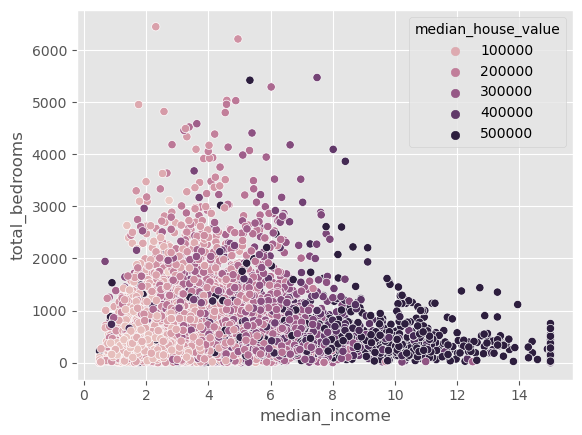

In [29]:
# Another way to plot

sns.scatterplot(data=housing_df, x='median_income', y='total_bedrooms', hue='median_house_value')
plt.show()

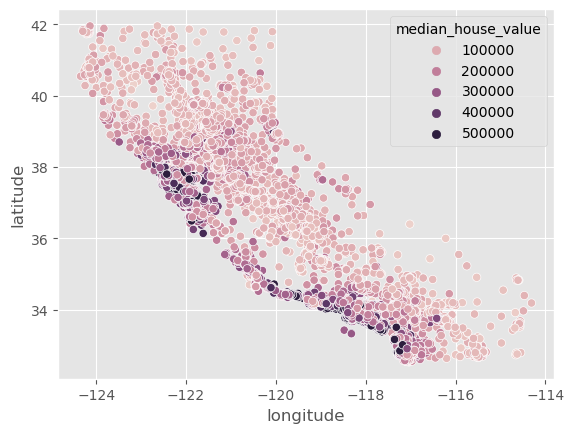

In [31]:
sns.scatterplot(data=housing_df, x='longitude', y='latitude', hue='median_house_value')
plt.show()

The more expensive houses are located near the water

### It's clear the features have different scales, we should keep this in mind

# Clean the Data